<a href="https://colab.research.google.com/github/panchamdesai777/Hackathons/blob/master/insurance_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insurance Churn Prediction**

---

![alt text](https://analyticsindiamag.com/wp-content/uploads/2020/04/Insurance_Churn-scaled.jpg)


### **Description:**

Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a different insurance provider.

For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behaviour to prevent retention. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

### **Dataset Description :** 

Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.
You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry

### **Overview of Train Data**

![alt text](https://www.machinehack.com/wp-content/uploads/2020/04/Screenshot-2020-04-22-at-12.04.50-PM-1024x201.png)


### **Overview of Test Data**

![alt text](https://www.machinehack.com/wp-content/uploads/2020/04/Screenshot-2020-04-22-at-12.06.59-PM-1024x212.png)

### **Sample Submission File**

![alt text](https://www.machinehack.com/wp-content/uploads/2020/04/Screenshot-2020-04-22-at-12.08.22-PM.png)



In [0]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [260]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (7).csv


In [261]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
df.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.28,-0.42,1.34,-0.01,0.08,1.08,0.18,3,0,1,0,0,0,0,10,2,1
1,0.85,0.15,0.50,-0.98,-0.57,-0.41,-0.25,4,1,2,0,1,0,0,0,3,0
2,0.95,-0.17,1.83,-0.70,0.08,-0.41,-0.25,6,1,2,0,0,0,0,5,3,0
3,0.85,-0.38,0.98,-0.04,-0.57,-0.41,-0.25,4,0,2,0,1,0,0,5,3,0
4,1.32,1.59,-1.18,-0.10,-0.25,-0.41,-0.25,0,1,1,0,0,0,0,8,3,0


In [262]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,4.34,1.17,1.23,0.02,0.56,0.16,0.64,5.52,2.56,0.12
std,1.00,1.01,1.00,1.00,1.00,0.99,0.80,3.27,0.61,0.75,0.13,0.50,0.37,0.90,3.00,0.99,0.32
min,-2.16,-3.08,-1.78,-1.00,-0.57,-0.41,-0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.75,-0.42,-0.94,-0.60,-0.57,-0.41,-0.25,1.00,1.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00,0.00
50%,-0.18,-0.30,0.02,-0.30,-0.25,-0.41,-0.25,4.00,1.00,1.00,0.00,1.00,0.00,0.00,6.00,3.00,0.00
75%,0.67,0.02,0.62,0.24,0.08,-0.41,-0.25,7.00,2.00,2.00,0.00,1.00,0.00,2.00,8.00,3.00,0.00
max,5.09,33.09,1.83,18.09,19.44,8.13,23.63,11.00,2.00,3.00,1.00,1.00,1.00,2.00,11.00,3.00,1.00


## **Applying Classification ALgorithm without treating imbalnce**

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8980
           1       0.62      0.23      0.33      1193

    accuracy                           0.89     10173
   macro avg       0.76      0.60      0.64     10173
weighted avg       0.87      0.89      0.87     10173

ROC_AUC_SCORE is 0.6048112411487202


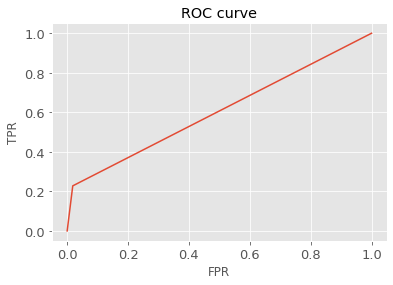

F1 SCORE: 0.3337423312883436
AUC Score = 60.48 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8980
           1       0.45      0.47      0.46      1193

    accuracy                           0.87     10173
   macro avg       0.69      0.70      0.69     10173
weighted avg       0.87      0.87      0.87     10173

ROC_AUC_SCORE is 0.6960579717991177


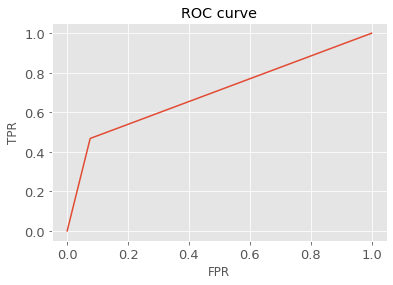

F1 SCORE: 0.45925925925925926
AUC Score = 69.61 %
On Model - 
Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8980
           1       0.66      0.40      0.50      1193

    accuracy                           0.91     10173
   macro avg       0.79      0.69      0.72     10173
weighted avg       0.89      0.91      0.90     10173

ROC_AUC_SCORE is 0.6882883076296958


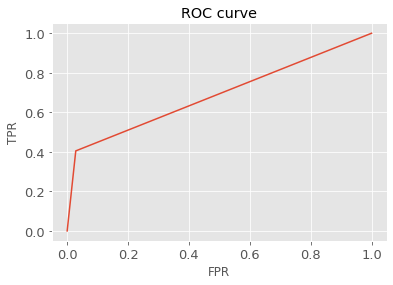

F1 SCORE: 0.5005181347150259
AUC Score = 68.83 %
On Model - 
Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8980
           1       0.67      0.36      0.47      1193

    accuracy                           0.90     10173
   macro avg       0.79      0.67      0.71     10173
weighted avg       0.89      0.90      0.89     10173

ROC_AUC_SCORE is 0.6678834590045496


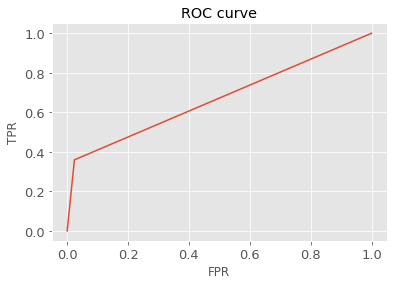

F1 SCORE: 0.4673202614379085
AUC Score = 66.79 %
On Model - 
XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8980
           1       0.65      0.39      0.48      1193

    accuracy                           0.90     10173
   macro avg       0.79      0.68      0.72     10173
weighted avg       0.89      0.90      0.89     10173

ROC_AUC_SCORE is 0.6789271399421646


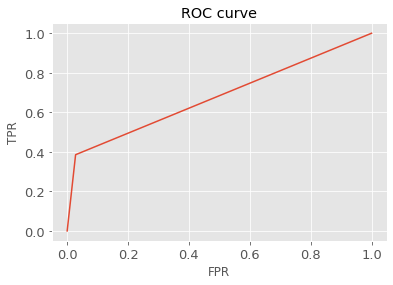

F1 SCORE: 0.4837013669821241
AUC Score = 67.89 %
On Model - 
Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8980
           1       0.65      0.46      0.54      1193

    accuracy                           0.91     10173
   macro avg       0.79      0.71      0.74     10173
weighted avg       0.90      0.91      0.90     10173

ROC_AUC_SCORE is 0.7141709620148714


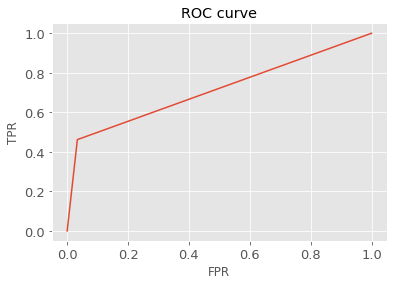

F1 SCORE: 0.5388753056234719
AUC Score = 71.42 %
On Model - 
Lightgbm Classifier


In [263]:
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.metrics import f1_score
#Applying Classification algorithms without treating imbalance
from sklearn.model_selection import train_test_split

def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.3,random_state=9)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

    F1_score=f1_score(y_val, y_scores)
    print('F1 SCORE:',F1_score)
    return auc

# Predictors
X = df.iloc[:,:-1]

# Target
y = df.iloc[:,-1]

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier,'Lightgbm Classifier':LGBMClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X, y, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)

In [237]:
df.nunique()

feature_0       77
feature_1     6434
feature_2       31
feature_3     1482
feature_4       47
feature_5      517
feature_6       36
feature_7       12
feature_8        3
feature_9        4
feature_10       2
feature_11       2
feature_12       2
feature_13       3
feature_14      12
feature_15       4
labels           2
dtype: int64

In [241]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00,33908.00
mean,0.30,0.09,0.49,0.05,0.03,-0.00,-0.01,4.34,1.17,1.23,0.02,0.56,0.16,0.64,5.52,2.56,0.12
std,0.14,0.03,0.28,0.05,0.05,0.99,0.80,3.27,0.61,0.75,0.13,0.50,0.37,0.90,3.00,0.99,0.32
min,0.00,0.00,0.00,0.00,0.00,-0.41,-0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.07,0.23,0.02,0.00,-0.41,-0.25,1.00,1.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00,0.00
50%,0.27,0.08,0.50,0.04,0.02,-0.41,-0.25,4.00,1.00,1.00,0.00,1.00,0.00,0.00,6.00,3.00,0.00
75%,0.39,0.09,0.67,0.06,0.03,-0.41,-0.25,7.00,2.00,2.00,0.00,1.00,0.00,2.00,8.00,3.00,0.00
max,1.00,1.00,1.00,1.00,1.00,8.13,23.63,11.00,2.00,3.00,1.00,1.00,1.00,2.00,11.00,3.00,1.00


In [0]:
#df1=pd.get_dummies(df,columns=['feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_15'])
#df1

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=18, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5998
           1       0.57      0.58      0.58       784

    accuracy                           0.90      6782
   macro avg       0.76      0.76      0.76      6782
weighted avg       0.90      0.90      0.90      6782

F1 SCORE: 0.5772151898734177


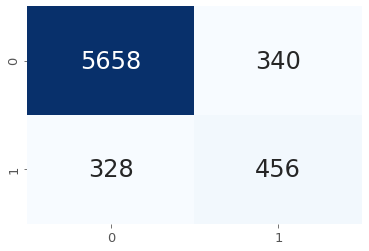

In [264]:
#lgbm with Smote
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
X1=df.drop('labels',1)
y1=df['labels']
lgb_model=LGBMClassifier(boosting_type='gbdt',n_estimators=100,random_state=18)
smote = SMOTE(ratio='minority')
x_train,x_test,y_train,y_test= train_test_split(X1,y1,test_size=0.2,random_state=18)
x_train_sm,y_train_sm=smote.fit_sample(x_train,y_train)
lgb_model.fit(x_train_sm,y_train_sm)
y_pred=lgb_model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

class_report=classification_report(y_test,y_pred)
print(class_report)
F1_score=f1_score(y_test, y_pred)
print('F1 SCORE:',F1_score)

BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                importance_type='split',
                                                learning_rate=0.1, max_depth=-1,
                                                min_child_samples=20,
                                                min_child_weight=0.001,
                                                min_split_gain=0.0,
                                                n_estimators=100, n_jobs=-1,
                                                num_leaves=31, objective=None,
                                                random_state=18, reg_alpha=0.0,
                                                reg_lambda=0.0, silent=True,
                                                subsample=1.0,
                                                subsa

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5998
           1       0.58      0.60      0.59       784

    accuracy                           0.90      6782
   macro avg       0.76      0.77      0.77      6782
weighted avg       0.91      0.90      0.90      6782

F1 SCORE: 0.5903689806128829


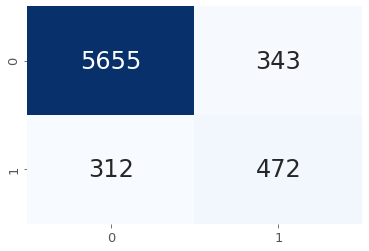

In [265]:
#Bagging for lgbm
from sklearn.ensemble import BaggingClassifier
X3=df.drop('labels',1)
y3=df['labels']
bagging_clf=BaggingClassifier(lgb_model,random_state=9)

#___________________________________________________________________________________________________
x_train,x_test,y_train,y_test= train_test_split(X3,y3,test_size=0.2,random_state=18)
smote = SMOTE(ratio='minority')
x_train_sm1,y_train_sm1=smote.fit_sample(x_train,y_train)
bagging_clf.fit(x_train_sm1,y_train_sm1)
y_pred_bg=bagging_clf.predict(x_test)
class_report=classification_report(y_test,y_pred_bg)
print(class_report)
F1_score=f1_score(y_test, y_pred_bg)
print('F1 SCORE:',F1_score)

#____________________________________________________________________________________________________
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_bg)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5998
           1       0.56      0.57      0.56       784

    accuracy                           0.90      6782
   macro avg       0.75      0.75      0.75      6782
weighted avg       0.90      0.90      0.90      6782

F1 SCORE: 0.5622236260265319


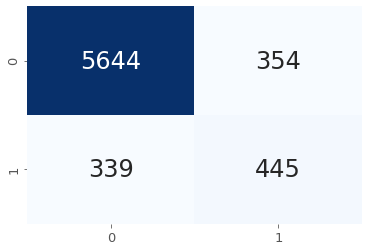

In [266]:
#Rf tuned
X7=df.drop('labels',1)
y7=df['labels']

#Intializing Random Forest Model
rfc_model=RandomForestClassifier(criterion='gini',max_features='auto',random_state=9)

#______________________________________________________________________________________________

#Train Test split
x_train,x_test,y_train,y_test= train_test_split(X7,y7,test_size=0.2,random_state=18)

#Applying smote
smote = SMOTE(ratio='minority')
x_train_sm2,y_train_sm2 = smote.fit_sample(x_train, y_train)

#fit and predict
rfc_model.fit(x_train_sm2,y_train_sm2)
y_pred_rfc=rfc_model.predict(x_test)

#Evaluation metric
class_report=classification_report(y_test,y_pred_rfc)
print(class_report)
F1_score=f1_score(y_test, y_pred_rfc)
print('F1 SCORE:',F1_score)

#Confusion metric
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [267]:
#Bagging Classifier for random forest
from sklearn.ensemble import BaggingClassifier
# Code starts here
X3=df.drop('labels',1)
y3=df['labels']
#__________________________________________________________________________________________________________________
bagging_clf_rf=BaggingClassifier(rfc_model,random_state=9)
x_train,x_test,y_train,y_test= train_test_split(X3,y3,test_size=0.2,random_state=18)
smote = SMOTE(ratio='minority')
x_train_sm5, y_train_sm5 = smote.fit_sample(x_train, y_train)
#_______________________________________________________________________________________________________________________
bagging_clf_rf.fit(x_train_sm5,y_train_sm5)
y_pred_bg_rf=bagging_clf_rf.predict(x_test)
#_____________________________________________________________________________________________________________________
class_report=classification_report(y_test,y_pred_bg_rf)
print(class_report)
F1_score=f1_score(y_test, y_pred_bg)
print('F1 SCORE:',F1_score)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5998
           1       0.54      0.62      0.58       784

    accuracy                           0.90      6782
   macro avg       0.75      0.78      0.76      6782
weighted avg       0.90      0.90      0.90      6782

F1 SCORE: 0.5903689806128829


In [276]:
#Ensemble method: Best acccracy
from sklearn.ensemble import VotingClassifier
X2=df.drop('labels',1)
y2=df['labels']
#______________________________________________________________________________________________________________________
x_train,x_test,y_train,y_test= train_test_split(X2,y2,test_size=0.2,random_state=18)
x_train_sm4, y_train_sm4 = smote.fit_sample(x_train,y_train)

#______________________________________________________________________________________________________________________
voting_clf_soft_2=VotingClassifier(estimators =[('bg_rf',bagging_clf_rf),('lgb_bg_2',bagging_clf)], voting = 'soft')
voting_clf_soft_2.fit(x_train_sm4, y_train_sm4)
y_pred_vote=voting_clf_soft_2.predict(x_test)

#______________________________________________________________________________________________________________________________ 
class_report=classification_report(y_test,y_pred_vote)
print(class_report)
F1_score=f1_score(y_test, y_pred_vote)
print('F1 SCORE:',F1_score)

VotingClassifier(estimators=[('bg_rf',
                              BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                      ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features='auto',
                                                                                      max_leaf_nodes=None,
                                                                                      max_samples=None,
                                                                                      min_impurity_decrease=0.0,
                

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5998
           1       0.56      0.61      0.59       784

    accuracy                           0.90      6782
   macro avg       0.76      0.77      0.77      6782
weighted avg       0.90      0.90      0.90      6782

F1 SCORE: 0.5870098039215687


(47886, 29)

## **Test Data**

In [270]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test (4).csv


In [277]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
test_df = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
test_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.57,0.41,0.98,0.01,-0.57,-0.41,-0.25,0,1,1,0,0,0,0,11,3
1,-1.12,-0.17,0.50,-0.32,0.72,0.55,0.18,0,2,1,0,0,0,0,5,1
2,0.48,0.15,-0.58,-0.69,-0.25,-0.41,-0.25,0,1,1,0,0,0,0,1,3
3,1.61,-0.45,1.83,-0.98,7.18,-0.41,-0.25,1,1,0,0,1,0,0,5,3
4,-0.94,-0.36,-1.18,-0.32,0.08,-0.41,-0.25,8,2,1,0,1,0,2,8,3


In [0]:
#test_df=pd.get_dummies(test_df,columns=['feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_15'])
#test_df.shape

In [0]:
test_df['labels']=voting_clf_soft_2.predict(test_df)

In [0]:

A=test_df['labels']
A=pd.DataFrame(A)

In [0]:
A.to_excel('finals.xlsx')

In [0]:

from google.colab import files
files.download('finals.xlsx')